In [1]:
import sys
import os
# Add the parent directory to the system path to import modules from there
sys.path.append(os.path.abspath('..'))

In [2]:
from src import process_strain_field, sym_dis, df_to_X_y, build_lstm_model


/Users/jamesdear/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2025-05-25 18:18:22.757127: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


0.1


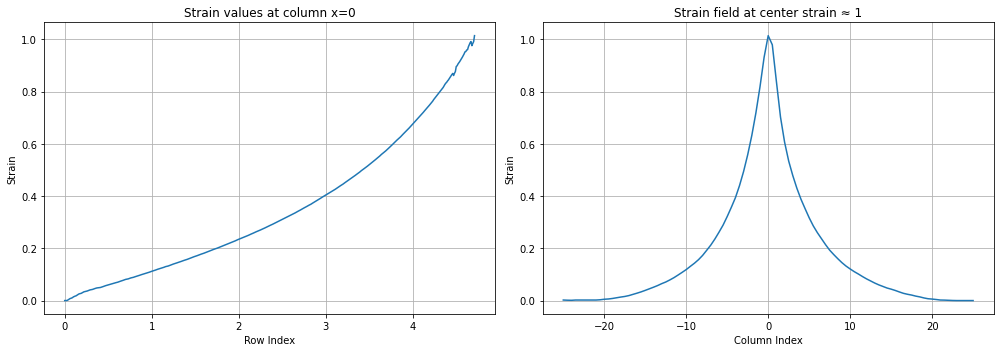

0.1


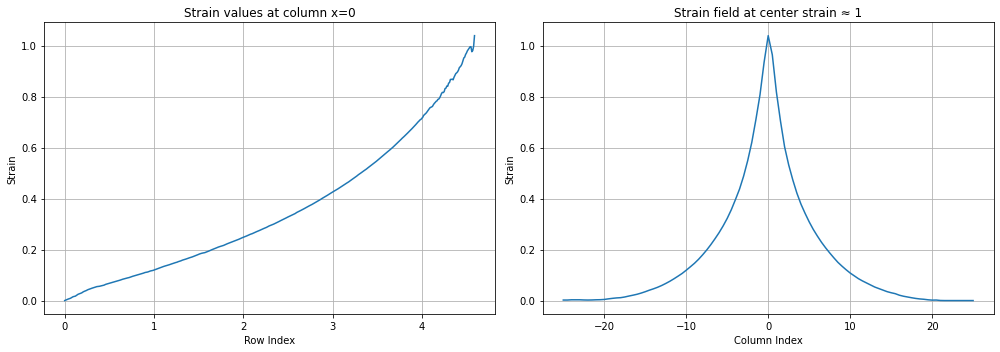

0.5


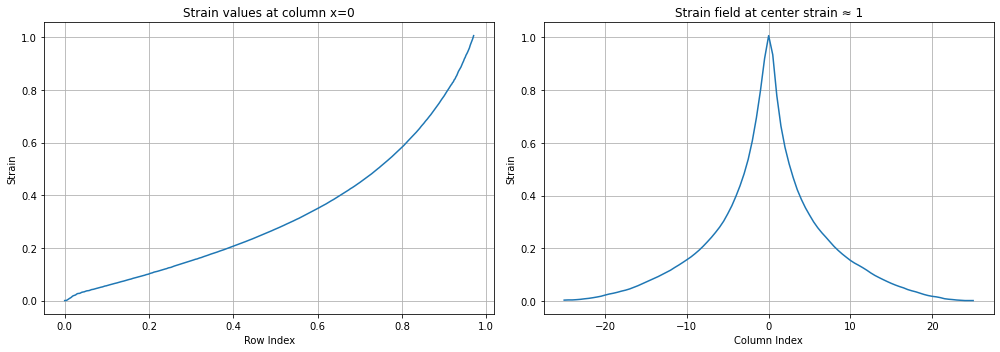

0.5


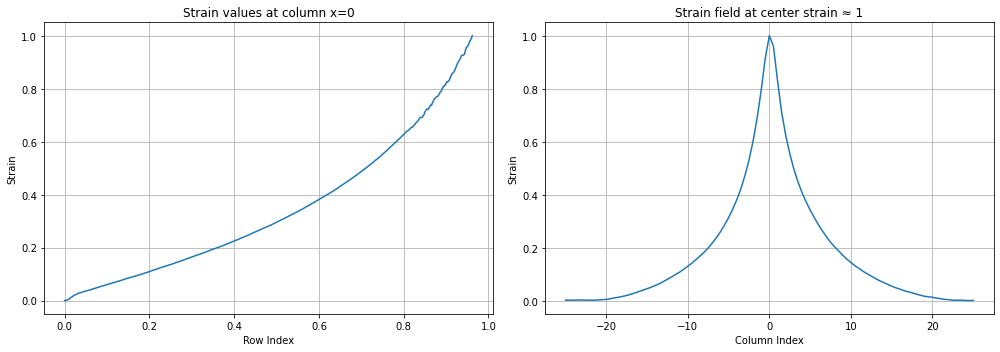

0.5


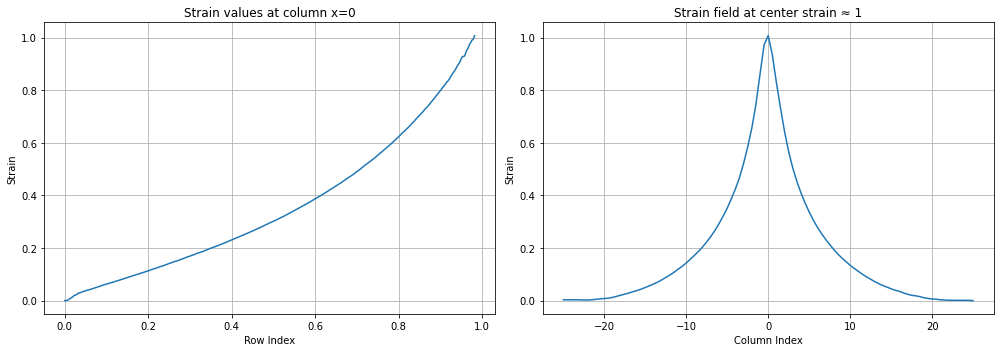

2.5


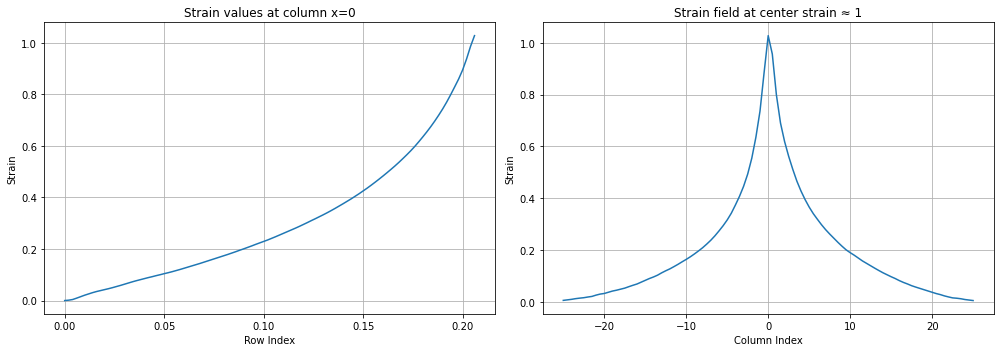

2.5


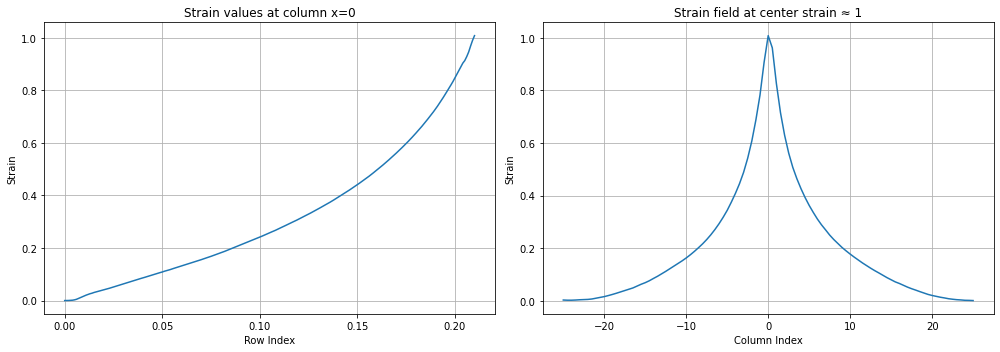

2.5


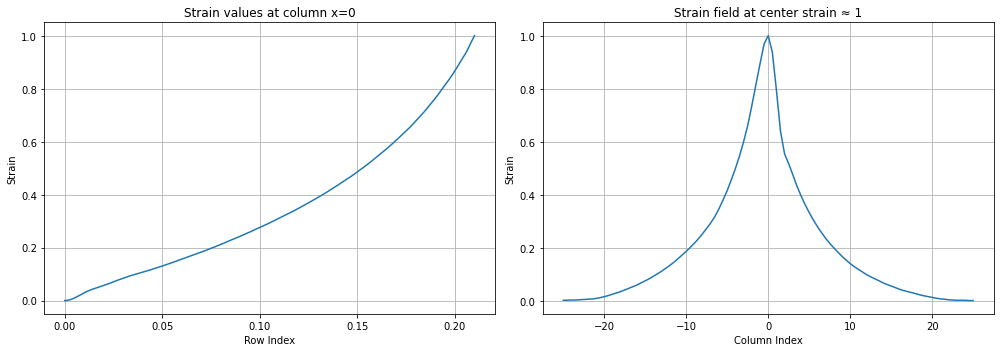

In [3]:
files = [
    '450-01.xlsx',
    '500-01.xlsx',
    '400-05.xlsx',
    '450-05.xlsx',
    '500-05.xlsx',
    '400-25.xlsx',
    '450-25.xlsx',
    '500-25.xlsx'
]

import os
import numpy as np

data_dir = '../data/raw'
rolling = 3
window_size = 1
X_all, y_all = [], []

for file in files:
    temp_str, sr_str = file.replace('.xlsx', '').split('-')
    temp = int(temp_str)
    SR = float(sr_str) / 10  # e.g. '25' -> 2.5, '01' -> 0.1
    print(SR)
    path = os.path.join(data_dir, file)
    df = process_strain_field(path, rolling_window=rolling, endpoint=25, max_centre_strain=1)
    df = sym_dis(df)
    X, y = df_to_X_y(df, temp, SR, window_size)

    X_all.append(X)
    y_all.append(y)


In [5]:
index = [0, 2, 3, 4, 6]  # Indices for: 450_01, 400_05, 450_05, 500_05, 450_25

X_train = np.concatenate([X_all[i] for i in index], axis=0)
y_train = np.concatenate([y_all[i] for i in index], axis=0)
X_val = np.concatenate([X_all[i] for i in range(len(X_all)) if i not in index], axis=0)
y_val = np.concatenate([y_all[i] for i in range(len(y_all)) if i not in index], axis=0)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (2143, 1, 3), y_train shape: (2143, 101)
X_test shape: (775, 1, 3), y_test shape: (775, 101)


In [ ]:
model = build_lstm_model()

model.fit(X_train, y_train, epochs=200, verbose=2, validation_data=(X_test, y_test))


Epoch 1/200
67/67 - 2s - 35ms/step - loss: 0.0150 - val_loss: 0.0064
Epoch 2/200
67/67 - 0s - 4ms/step - loss: 0.0038 - val_loss: 0.0018
Epoch 3/200
67/67 - 0s - 5ms/step - loss: 9.3041e-04 - val_loss: 7.1707e-04
Epoch 4/200
67/67 - 0s - 4ms/step - loss: 5.5889e-04 - val_loss: 6.2305e-04
Epoch 5/200
67/67 - 0s - 4ms/step - loss: 5.0094e-04 - val_loss: 5.9809e-04
Epoch 6/200
67/67 - 0s - 5ms/step - loss: 4.7410e-04 - val_loss: 5.6923e-04
Epoch 7/200
67/67 - 0s - 5ms/step - loss: 4.5074e-04 - val_loss: 5.2321e-04
Epoch 8/200
67/67 - 0s - 5ms/step - loss: 4.2275e-04 - val_loss: 5.0680e-04
Epoch 9/200
67/67 - 0s - 5ms/step - loss: 4.0101e-04 - val_loss: 4.8529e-04
Epoch 10/200
67/67 - 0s - 7ms/step - loss: 3.7164e-04 - val_loss: 4.5980e-04
Epoch 11/200
67/67 - 0s - 5ms/step - loss: 3.4697e-04 - val_loss: 4.2588e-04
Epoch 12/200
67/67 - 0s - 4ms/step - loss: 3.2360e-04 - val_loss: 3.8443e-04
Epoch 13/200
67/67 - 0s - 4ms/step - loss: 3.0062e-04 - val_loss: 3.8142e-04
Epoch 14/200
67/67 - 0s